### Q1. What is Gradient Boosting Regression?
Ans: \
**Gradient Boosting Regression (GBR)** is a machine learning algorithm used for **regression tasks** (predicting continuous values) by combining multiple weak learners (typically decision trees) into a **strong model**.

Gradient Boosting is an ensemble learning method that builds a series of models sequentially, where each new model tries to correct the errors (residuals) of the previous ones. It is called "gradient" boosting because it **minimizes the residuals using gradient descent**.

In **Gradient Boosting Regression**, the aim is to predict continuous outcomes, for example, house prices or stock prices.

---

###  **Working:**

1. **Initialization:**
   - Start with an initial prediction (usually the mean of the target values in the training set).

2. **Sequential Learning:**
   - In each iteration, a new weak learner (typically a decision tree) is added to the model.
   - The model **focuses on the residuals (errors)** of the previous iteration.
   - The residuals represent how far off the model’s previous predictions were from the true values.

3. **Gradient Descent on Residuals:**
   - In each round, the algorithm **fits a model to the residuals** using a gradient descent approach to minimize the loss function.
   - The new model is added to the ensemble with a weight (learning rate) that determines how much influence it has.

4. **Update the Prediction:**
   - The final prediction is the sum of the initial prediction and all the contributions from the subsequent weak learners.

---

###  **Mathematical Formulation:**

For a regression task, the gradient boosting model predicts the target \( y \) as:

$$[
F(x) = F_0 + \sum_{m=1}^{M} \gamma_m h_m(x)
]$$

Where:
- \( F(x) \) is the final prediction
- $( F_0 $) is the initial prediction (mean of the target values)
- $( h_m(x) $) is the weak learner (decision tree) at iteration \( m \)
- $( \gamma_m $) is the weight of the weak learner at iteration \( m \)
- $( M $) is the total number of iterations (trees)

The **goal** of each iteration is to **minimize the residuals** (the difference between true values and the predicted values) using a gradient-based optimization approach.

---

###  **Loss Function for Regression:**

The **loss function** in Gradient Boosting Regression is typically the **mean squared error (MSE)** for regression tasks:

$$[
\mathcal{L} = \frac{1}{N} \sum_{i=1}^{N} \left(y_i - F(x_i)\right)^2
]$$

Where:
- $( y_i )$ is the true target value for sample \( i \)
- $( F(x_i) )$ is the predicted value for sample \( i \)

This loss function measures the difference between the predicted and true values, and the algorithm aims to minimize it through gradient descent.

---

###  **Key Characteristics of Gradient Boosting Regression:**

1. **Sequential Learning:**
   - Each new tree is trained on the residuals of the previous model.
   
2. **Ensemble of Weak Learners:**
   - Uses decision trees as weak learners, but combined together, they create a powerful model.

3. **Gradient Descent Optimization:**
   - The algorithm uses **gradient descent** to minimize the loss function and update the model with each iteration.

4. **Overfitting Risk:**
   - Gradient Boosting can overfit if the number of iterations is too high or if the trees are too deep. Proper tuning (e.g., adjusting the learning rate, tree depth) is needed.

---

###  **Advantages:**

- **Highly accurate**: It typically outperforms other regression models.
- **Flexibility**: Can handle various loss functions and types of data.
- **Handles missing data well**.

###  **Limitations:**

- **Sensitive to noise**: Can overfit noisy data.
- **Computationally expensive**: Requires more time for training compared to simpler models.
- **Requires careful hyperparameter tuning** (e.g., learning rate, number of trees).

---

###  **Summary:**
Gradient Boosting Regression is a powerful, **sequential ensemble method** that uses gradient descent to optimize the model by fitting weak learners to the residuals of the previous learners, ultimately building a robust predictive model.

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Training MSE: 34.648841765787424
Test MSE: 36.68854719367578
Training R-squared: 0.0
Test R-squared: 0.0


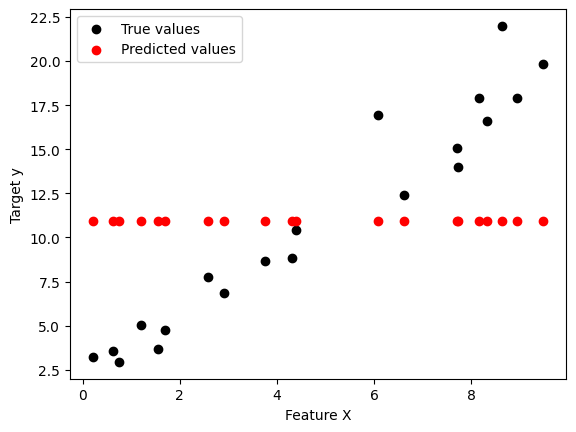

In [2]:
"""
Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.
"""
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Generate a simple regression dataset
np.random.seed(42)

# Generate some data: y = 2 * x + 1 + noise
X = np.random.rand(100, 1) * 10  # 100 data points, feature x between 0 and 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2  # Linear relation with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Implement Gradient Boosting Algorithm

# Define the weak learner: A simple decision stump (tree with a single split)
def decision_stump(X, y):
    best_split = None
    min_error = float('inf')

    for threshold in np.unique(X):  # Try all possible thresholds
        # Use element-wise comparison and broadcasting to create predictions
        predictions = np.where(threshold > X, np.mean(y[threshold > X]), np.mean(y[threshold <= X]))
        error = np.sum((predictions - y) ** 2)
        if error < min_error:
            min_error = error
            best_split = threshold
    return best_split

# Gradient Boosting algorithm from scratch
def gradient_boosting(X, y, n_estimators=100, learning_rate=0.1):
    # Initialize the model with the mean value of the target
    F = np.ones_like(y) * np.mean(y)

    for m in range(n_estimators):
        # Calculate residuals (errors)
        residuals = y - F

        # Fit a weak learner (decision stump) on the residuals
        stump = decision_stump(X, residuals)

        # Update the model by adding the weak learner’s prediction, scaled by the learning rate
        F += learning_rate * (X > stump) * (np.mean(residuals))

    return F

# Step 3: Train the Gradient Boosting model
n_estimators = 100
learning_rate = 0.1
y_pred_train = gradient_boosting(X_train, y_train, n_estimators, learning_rate)
y_pred_test = gradient_boosting(X_test, y_test, n_estimators, learning_rate)

# Step 4: Evaluate the model using MSE and R-squared
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Training R-squared: {r2_train}")
print(f"Test R-squared: {r2_test}")

# Plot the predicted vs actual values for visualization
plt.scatter(X_test, y_test, color='black', label='True values')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted values')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.show()


In [4]:
"""
Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters
"""
## GridSearch
# Grid search tests all possible combinations of hyperparameters within the given range.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC # This import is not used
from sklearn.datasets import load_iris

# Load data
data = load_iris()
X, y = data.data, data.target

# Define the model
model = RandomForestClassifier()

# Define the hyperparameters grid
# Removed 'learning_rate' as it's not a valid parameter for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],    # Number of trees
    'max_depth': [None, 10, 20, 30],    # Max depth of each tree
    'min_samples_split': [2, 5, 10]     # Minimum number of samples required to split an internal node
}

# Setup grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [5]:
# Random search picks random combinations of hyperparameters from the given ranges,
# which can sometimes be more efficient if there are many parameters to tune
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from scipy.stats import randint

# Load data
data = load_iris()
X, y = data.data, data.target

# Define the model
model = RandomForestClassifier()

# Define the hyperparameters distribution
param_dist = {
    'n_estimators': randint(50, 200),    # Random number of trees between 50 and 200
    'max_depth': [None, 10, 20, 30],      # Max depth choices
    'min_samples_split': randint(2, 10),  # Random min samples split between 2 and 10
}

# Setup random search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit random search
random_search.fit(X, y)

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_


Best parameters found:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 142}


### Q4. What is a weak learner in Gradient Boosting?
Ans: \
In **Gradient Boosting**, a **weak learner** refers to a model that performs slightly better than random guessing. In the context of gradient boosting algorithms, weak learners are typically **decision trees** with limited depth, such as **stumps** (trees with just one split).

### Why are weak learners used in Gradient Boosting?

The idea behind using weak learners is that, instead of relying on a single strong model, **gradient boosting** builds a sequence of models where each new model tries to correct the mistakes (residuals) made by the previous models. This sequential learning approach allows the ensemble to gradually improve its performance.

- **Weak learners** are intentionally simple models, usually decision trees with shallow depth (often just a **decision stump**), because they are fast to train and easy to modify to focus on the mistakes made by previous models.
- Each weak learner, when added to the ensemble, attempts to minimize the residual errors from the combined predictions of all previous models.

### The Gradient Boosting Process:

1. **Initialization**: The process begins by initializing the model with a simple base model (e.g., predicting the mean for regression or the most frequent class for classification).
  
2. **Training weak learners**: After each iteration, a weak learner (typically a shallow decision tree) is trained to predict the residual errors from the previous model's predictions.
  
3. **Model update**: The predictions of the weak learner are then added to the model, and the weights of the trees are updated based on the errors (or gradients) of the current model.

4. **Repeat**: This process repeats for multiple iterations, with each weak learner correcting the errors made by the ensemble model up to that point.

### Why weak learners?
- **Simplicity**: By using weak learners, the model can focus on learning from the errors made by previous iterations. Complex models can overfit to the data and might not generalize well.
- **Boosting**: The sequential addition of weak learners, each focusing on improving the performance of the entire model, leads to a highly effective ensemble, which is strong in performance but still built from simple, weak learners.

### Key Point:
In gradient boosting, weak learners (like shallow decision trees) are not necessarily "bad" models; they are just models that alone wouldn't perform well, but when combined with other models in a boosting framework, they form a much stronger predictive model.

Would you like more details on how the weak learner contributes to the overall boosting algorithm, or are you working on applying this concept in a specific project?

### Q5. What is the intuition behind the Gradient Boosting algorithm?
Ans: \
The step-by-step intuition:

### 1. **Ensemble Learning**
- **Gradient Boosting** is an **ensemble method**, meaning it combines multiple weak models to create a strong model.
- The goal is to minimize a **loss function** (like Mean Squared Error for regression or Log Loss for classification) by adding models that progressively correct the errors made by previous ones.

### 2. **Weak Learners** and Iterative Learning
- **Weak Learners**: These are simple models (typically shallow decision trees) that perform just slightly better than random guessing.
- The idea is not to build a single, complex model but rather a series of simple models that work together to make accurate predictions.

### 3. **Gradient Descent Optimization**
- The term **"gradient"** in Gradient Boosting comes from the fact that the algorithm uses **gradient descent** to minimize the loss function.
- **Gradient descent** is an optimization technique used to find the minimum of a function by moving in the direction of the steepest decrease (i.e., the negative gradient).
- In Gradient Boosting, each new weak learner is trained to predict the residuals (errors) of the previous model, effectively following the negative gradient of the loss function.

### 4. **Boosting Process (Sequential Addition of Learners)**
- Start with an initial model: The initial model can be as simple as predicting the mean (for regression) or the most frequent class (for classification).
  
- **Fit a weak learner**: In the next step, train a weak learner (a small decision tree) to predict the **residual errors** (the difference between the current model’s predictions and the true target values).
  
- **Update the model**: Add the predictions from this new learner to the existing model, adjusting the model's output in a way that reduces the residual errors.
  
- **Iterate**: Repeat the process for several iterations, where each new weak learner is trained on the residual errors of the combined previous models. Each learner adds more corrective power to the overall model.

### 5. **Learning Rate (Shrinkage)**
- **Learning rate** controls how much each weak learner contributes to the final model. A smaller learning rate means that each weak learner's influence is reduced, and the model requires more iterations to converge.
- By choosing a small learning rate and increasing the number of learners, we can prevent overfitting and improve the generalization of the model.

### 6. **Why it works:**
- **Residuals or Errors**: Each weak learner in the sequence focuses on the residuals or errors made by the model so far. It adjusts the current predictions to improve the overall model performance.
- **Gradient Descent**: The algorithm minimizes the loss function (a measure of how wrong the model's predictions are) by following the gradient (direction of steepest decrease). This ensures that the sequence of learners is always moving towards improving the model’s accuracy.

### 7. **Key Properties:**
- **Sequential Learning**: The model builds iteratively, learning from previous mistakes.
- **Additive Model**: The model is built by adding learners one by one, with each new learner trying to reduce the residual error.
- **Overfitting Control**: With hyperparameters like **learning rate**, **maximum depth of trees**, and **number of trees**, gradient boosting can be controlled to avoid overfitting.
- **Flexibility**: Gradient boosting can be applied to various loss functions (like regression, classification, etc.) and uses decision trees as the base learners.

### Example with Intuition:

Let's say we are predicting house prices (a regression problem):
1. Start with an initial model that predicts the **mean house price**. This is your base prediction.
2. The first weak learner (a decision tree) tries to predict the **errors** (the difference between the actual prices and the predicted mean).
3. Add this new learner's prediction to the base prediction. Now, the model is a combination of the initial mean prediction and the correction from the first tree.
4. The next weak learner focuses on correcting the residual errors from the combined model (which is the difference between actual prices and the current combined predictions).
5. Repeat this process until a stopping criterion is met, such as a maximum number of iterations or when the improvement in the model becomes negligible.


### Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?
Ans: \

###  **Core Idea**:
Gradient Boosting builds an ensemble **sequentially**, where **each weak learner tries to correct the errors** made by the combined previous learners.

---

###  Step-by-Step Breakdown:

#### 1. **Initialize the Model**
- Start with a simple prediction for all data points.  
  - For regression: use the **mean** of the target values.  
  - For classification: use **log odds** or **class probabilities**.

Let’s denote this as:
```
F₀(x) = initial prediction
```

---

#### 2. **Iterate to Add Weak Learners**
For `m = 1 to M` (where `M` is the number of trees):

##### a. **Compute the Residuals (or Gradients)**
- These are the negative gradients of the loss function with respect to the current model predictions.
- Think of them as the **errors** the current model is making.

For example, in regression with MSE loss:
```
residual = yᵢ - Fₘ₋₁(xᵢ)
```

In classification (e.g., using Log Loss), the gradient is more complex, but it still represents the direction to reduce the error.

---

##### b. **Train a Weak Learner on the Residuals**
- Fit a new decision tree (usually a **shallow tree**, like depth 3) to predict the residuals.
```
hₘ(x) ≈ residuals
```

---

##### c. **Update the Model**
- Add the predictions of the new tree to the existing model, scaled by a **learning rate (α)**:
```
Fₘ(x) = Fₘ₋₁(x) + α * hₘ(x)
```

- This way, each tree is **correcting** the mistakes made by the current model.

---

#### 3. **Final Model**
After `M` iterations (i.e., adding `M` trees), you get a strong ensemble model:
```
F_M(x) = F₀(x) + α * h₁(x) + α * h₂(x) + ... + α * h_M(x)
```

Each `hᵢ(x)` is a **weak learner**, but together they form a **powerful ensemble**.

---

### 🔧 Key Components:
- **Weak Learners**: Usually shallow decision trees.
- **Loss Function**: Guides the boosting process (e.g., MSE for regression, Log Loss for classification).
- **Gradient**: Residuals are based on the derivative (gradient) of the loss function.
- **Learning Rate (α)**: Controls how much each tree contributes (smaller values slow learning and reduce overfitting).
- **Number of Trees (M)**: More trees can improve accuracy but also risk overfitting.

In [6]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,      # Number of trees (weak learners)
    learning_rate=0.1,     # Shrinkage factor for each tree's contribution
    max_depth=3,           # Depth of each weak learner (shallow tree)
    random_state=42
)

# Train the model
gb_clf.fit(X_train, y_train)

# Predict on test set
y_pred = gb_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 1.0


###  What’s Happening Under the Hood:
- `n_estimators=100`: The model will add **100 weak learners** (small decision trees).
- `learning_rate=0.1`: Each tree's prediction is **scaled** to prevent overfitting.
- `max_depth=3`: Each weak learner is a tree of depth 3 (not a full decision tree).

Each iteration:
1. Computes the residual errors from the current model.
2. Fits a new decision tree on those residuals.
3. Adds the new tree to the existing model, slightly adjusting the final prediction.

### Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?
Ans: \

##  **Steps to Construct the Mathematical Intuition of Gradient Boosting**

###  Problem Setup:
We are given a dataset:
- Inputs: $( x_1, x_2, \dots, x_n \in \mathbb{R}^d $)
- Targets: $( y_1, y_2, \dots, y_n \in \mathbb{R} )$ (for regression) or class labels (for classification)

The goal is to **learn a function** \( F(x) \) that **minimizes a loss function** $( \mathcal{L}(y, F(x)) )$.

---

###  **Step 1: Define the Loss Function**
Choose an appropriate loss function for your task:
- Regression → Mean Squared Error (MSE):  
  $$[ \mathcal{L}(y, F(x)) = \frac{1}{2}(y - F(x))^2 ]$$
- Classification → Log Loss:  
  $$[ \mathcal{L}(y, F(x)) = -[y \log(\hat{p}) + (1-y)\log(1 - \hat{p})] ]$$

This is the function we aim to **minimize**.

---

###  **Step 2: Initialize the Model**
Start with a simple prediction that minimizes the loss over all training data.

For MSE, it's:
$$[
F_0(x) = \arg\min_c \sum_{i=1}^{n} \mathcal{L}(y_i, c) = \text{mean}(y)
]$$

---

###  **Step 3: Iteratively Add Weak Learners**

Repeat for $( m = 1 ) to ( M )$ (number of boosting rounds):

####  3a. Compute Negative Gradients
These are the **residuals** or **pseudo-residuals**, i.e., the direction in which the current model's predictions should be adjusted to reduce loss.

For each data point:
$$[
r_i^{(m)} = -\left[ \frac{\partial \mathcal{L}(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{m-1}(x)}
]$$

> This is the **core idea**: the gradient of the loss function tells us how to adjust the model to improve performance.

---

####  3b. Fit a Weak Learner to the Residuals
Train a weak learner $( h_m(x) )$ (like a shallow decision tree) to fit the residuals $( r_i^{(m)} )$.

$$[
h_m(x) \approx r_i^{(m)}
]$$

---

####  3c. Compute Multiplier (Optional Step)
Sometimes a **line search** is used to find the best multiplier \( \gamma_m \) that minimizes loss:

$$[
\gamma_m = \arg\min_\gamma \sum_{i=1}^{n} \mathcal{L}\left(y_i, F_{m-1}(x_i) + \gamma h_m(x_i)\right)
]$$

---

####  3d. Update the Model
Add the new learner to the current model (scaled by the learning rate $( \alpha ))$:

$$[
F_m(x) = F_{m-1}(x) + \alpha \cdot \gamma_m \cdot h_m(x)
]$$

This gradually improves the model by **correcting previous mistakes**.

---

###  **Step 4: Final Model**
After \( M \) iterations:
$$[
F_M(x) = F_0(x) + \alpha \sum_{m=1}^{M} \gamma_m h_m(x)
]$$

This is your final boosted model — a sum of **weak learners**, each nudging the prediction in the right direction using gradient information.

---

###  Example: MSE Loss (Regression)
Let’s simplify the math for Mean Squared Error:

- Loss: $( \mathcal{L}(y, F(x)) = \frac{1}{2}(y - F(x))^2 )$$
- Gradient:  
  $$[
  r_i^{(m)} = -\frac{\partial \mathcal{L}}{\partial F(x)} = y_i - F_{m-1}(x_i)
  ]$$

So each weak learner is just trained to predict the **residuals**!

---

###  Summary Table

| Step | What Happens | Math |
|------|--------------|------|
| 1. Initialize | Predict a constant | \( F_0(x) = \arg\min_c \sum \mathcal{L}(y_i, c) \) |
| 2. Compute Gradient | Residuals of loss | \( r_i = -\frac{\partial \mathcal{L}}{\partial F(x)} \) |
| 3. Fit Learner | Fit tree on residuals | \( h_m(x) \approx r_i \) |
| 4. Update | Add tree to model | \( F_m(x) = F_{m-1}(x) + \alpha h_m(x) \) |
